In [ ]:
import numpy as np
import pandas as pd

# scale
from sklearn.preprocessing import StandardScaler

# model selectiion
from sklearn.model_selection import StratifiedKFold, cross_val_score

#knn
from sklearn.neighbors import KNeighborsClassifier

#svm
from sklearn import svm

#logestic regression
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import accuracy_score, classification_report

# load/save models
from sklearn.externals import joblib

# signed wilcoxon test

from scipy.stats import wilcoxon

In [0]:
# plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})
fontdict = {'fontsize': 18,
           'weight' : 'bold'}
palette = palette=['green','orange','brown','blue', 'red', 'black', 'yellow']
sns.set()

### load data

In [0]:
# Orginal data
df_train = pd.read_csv("./dataset/shuttle.trn", delimiter=' ', header=None)
df_test = pd.read_csv("./dataset/shuttle.tst", delimiter=' ', header=None)

X_train, y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1]

### train data with removing outlier and doing oversampling
X_train_adasyn = pd.read_csv("./Pre-preocess/X_train_adasyn", delimiter=' ', header=None)
y_train_adasyn = pd.read_csv("./Pre-preocess/y_train_adasyn", delimiter=' ', header=None)

### test data
X_test = pd.read_csv('./Pre-preocess/X_test', delimiter=' ', header=None)
y_test = pd.read_csv('./Pre-preocess/y_test', delimiter=' ', header=None)

### Compare

In [10]:
means = {'knn': [], 'svm': [], 'lr': []}

for i in range(10):
    print("Step: ", i)
    print(means)
    # clfs
    knn = KNeighborsClassifier(5)
    svm_model = svm.SVC(gamma=0.01, kernel='rbf', C=100)
    lr = LogisticRegression(C=8, random_state=0, solver='newton-cg', multi_class='multinomial')
    # kfold
    random_state = np.random.randint(2000)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
    
    print('KNN')
    means['knn'].append(cross_val_score(knn, X_train_adasyn, y_train_adasyn, cv=kfold).mean())
    print('SVM')
    means['svm'].append(cross_val_score(svm_model, X_train_adasyn, y_train_adasyn, cv=kfold, n_jobs=2).mean())
    print('LR')
    means['lr'].append(cross_val_score(lr, X_train_adasyn, y_train_adasyn, cv=kfold, n_jobs=3).mean())
    print(means)

Step:  0
{'knn': [], 'svm': [], 'lr': []}
KNN


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

SVM
LR
{'knn': [0.9977508791809967], 'svm': [0.9994829603087757], 'lr': [0.9837260894245798]}
Step:  1
{'knn': [0.9977508791809967], 'svm': [0.9994829603087757], 'lr': [0.9837260894245798]}
KNN


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

SVM
LR
{'knn': [0.9977508791809967, 0.9976732979990187], 'svm': [0.9994829603087757, 0.9995217350276591], 'lr': [0.9837260894245798, 0.9836356033852829]}
Step:  2
{'knn': [0.9977508791809967, 0.9976732979990187], 'svm': [0.9994829603087757, 0.9995217350276591], 'lr': [0.9837260894245798, 0.9836356033852829]}
KNN


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

SVM


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


LR
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829]}
Step:  3
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829]}
KNN


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

SVM


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


LR
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288]}
Step:  4
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288]}
KNN


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

SVM


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


LR
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288, 0.983622651747021]}
Step:  5
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288, 0.983622651747021]}
KNN


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

SVM


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


LR
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833, 0.9976862479665327], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197, 0.9995088168043564], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288, 0.983622651747021, 0.9837777456103101]}
Step:  6
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833, 0.9976862479665327], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197, 0.9995088168043564], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288, 0.983622651747021, 0.9837777456103101]}
KNN


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

SVM


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


LR
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833, 0.9976862479665327, 0.9976991444701115], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197, 0.9995088168043564, 0.9995217316861629], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288, 0.983622651747021, 0.9837777456103101, 0.9835838402716824]}
Step:  7
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833, 0.9976862479665327, 0.9976991444701115], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197, 0.9995088168043564, 0.9995217316861629], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288, 0.983622651747021, 0.9837777456103101, 0.9835838402716824]}
KNN


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

SVM


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


LR
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833, 0.9976862479665327, 0.9976991444701115, 0.997647444844934], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197, 0.9995088168043564, 0.9995217316861629, 0.9995088017676247], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288, 0.983622651747021, 0.9837777456103101, 0.9835838402716824, 0.9836614431733841]}
Step:  8
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833, 0.9976862479665327, 0.9976991444701115, 0.997647444844934], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197, 0.9995088168043564, 0.9995217316861629, 0.9995088017676247], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288, 0.983622651747021, 0.9837777456103101, 0.9835838402716824,

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

SVM
LR
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833, 0.9976862479665327, 0.9976991444701115, 0.997647444844934, 0.9976603647389843], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197, 0.9995088168043564, 0.9995217316861629, 0.9995088017676247, 0.9995346532509615], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288, 0.983622651747021, 0.9837777456103101, 0.9835838402716824, 0.9836614431733841, 0.9835968253249036]}
Step:  9
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833, 0.9976862479665327, 0.9976991444701115, 0.997647444844934, 0.9976603647389843], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197, 0.9995088168043564, 0.9995217316861629, 0.9995088017676247, 0.9995346532509615], 'lr': [0.9837260894245798, 0.983635603385

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

SVM


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


LR
{'knn': [0.9977508791809967, 0.9976732979990187, 0.9976732979990187, 0.9976086667845546, 0.9976991678605833, 0.9976862479665327, 0.9976991444701115, 0.997647444844934, 0.9976603647389843, 0.9976086717967988], 'svm': [0.9994829603087757, 0.9995217350276591, 0.9995217350276591, 0.9995088067798686, 0.9994829653210197, 0.9995088168043564, 0.9995217316861629, 0.9995088017676247, 0.9995346532509615, 0.9994700287194893], 'lr': [0.9837260894245798, 0.9836356033852829, 0.9836356033852829, 0.9835967635072288, 0.983622651747021, 0.9837777456103101, 0.9835838402716824, 0.9836614431733841, 0.9835968253249036, 0.9835967568242369]}


### Boxplot

In [11]:
bp = pd.DataFrame([means['knn'], means['svm'], means['lr']]).T
bp = bp.rename({0: 'KNN', 1: 'SVM', 2: 'LR'}, axis=1)
bp

,KNN,SVM,LR
0,0.997751,0.999483,0.983726
1,0.997673,0.999522,0.983636
2,0.997673,0.999522,0.983636
3,0.997609,0.999509,0.983597
4,0.997699,0.999483,0.983623
5,0.997686,0.999509,0.983778
6,0.997699,0.999522,0.983584
7,0.997647,0.999509,0.983661
8,0.997660,0.999535,0.983597
9,0.997609,0.999470,0.983597


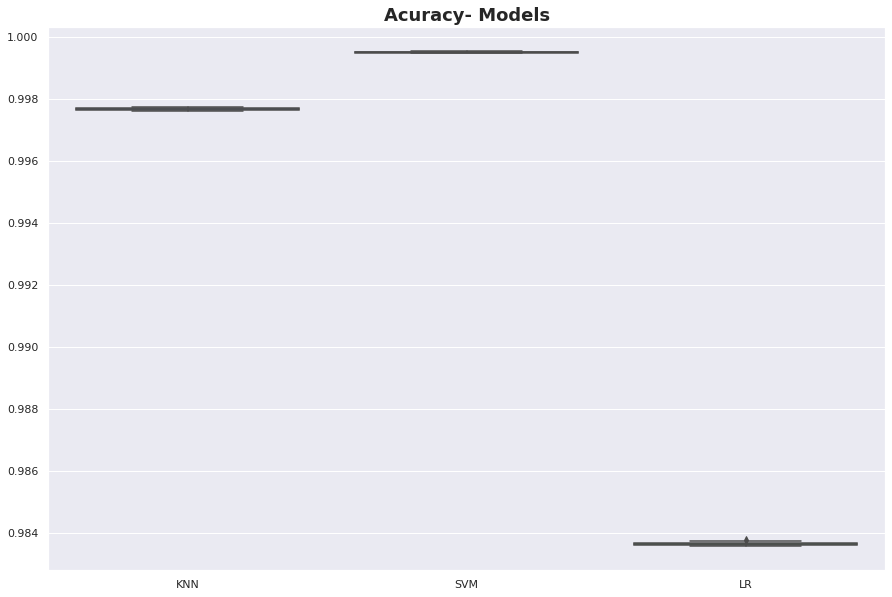

In [12]:
g = sns.boxplot(data=bp)
g.set_title('Acuracy- Models', fontdict=fontdict);